##Import Libraries


In [4]:
import pandas as pd

##Load the dataset

In [5]:
df = pd.read_csv("/content/Iris.csv")

## Explore Data

In [6]:
# Show first few rows
print(df.head())

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id             

## Prepare the Data

In [7]:
# Drop 'Id' column (not useful for prediction)
df.drop(columns=['Id'], inplace=True)

# Features and labels
X = df.drop('Species', axis=1)
y = df['Species']


## Data Visualization

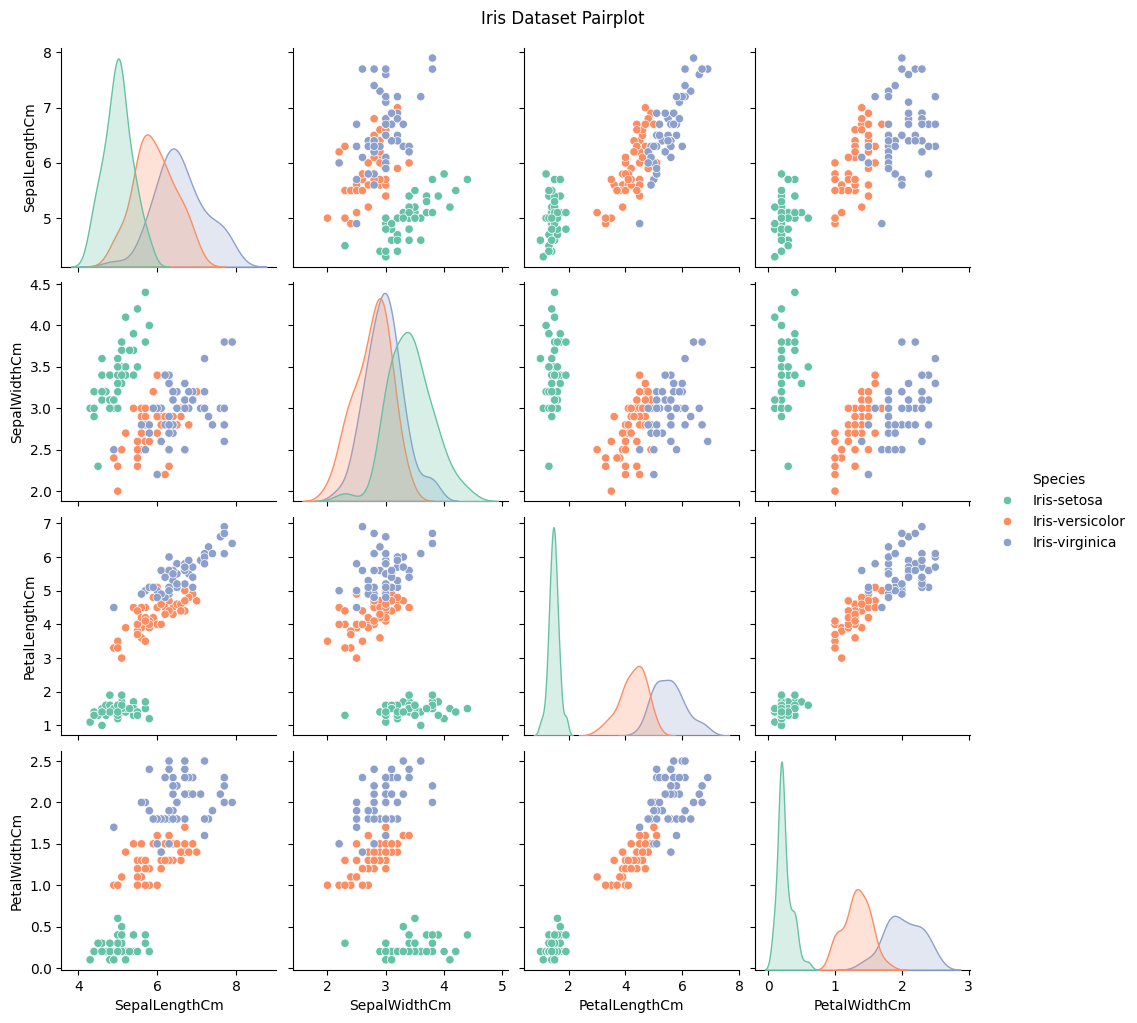

In [12]:
# Pairplot
sns.pairplot(df, hue='Species', palette='Set2')
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()

## Heatmap of Feature Correlation

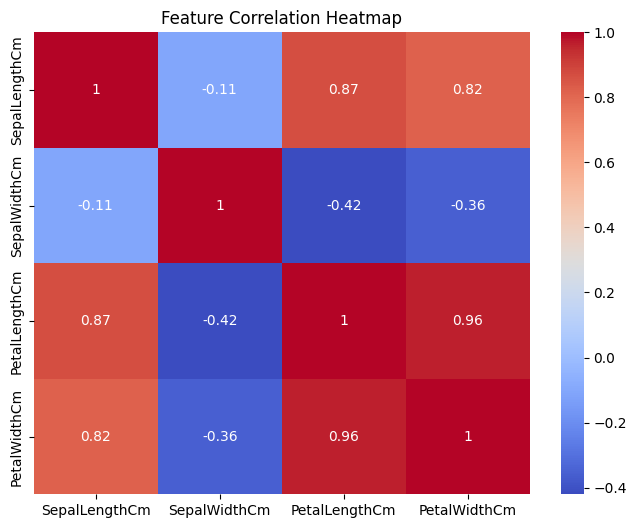

In [13]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Boxplot per Feature

/tmp/ipython-input-14-112198921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=feature, data=df, palette='Set3')


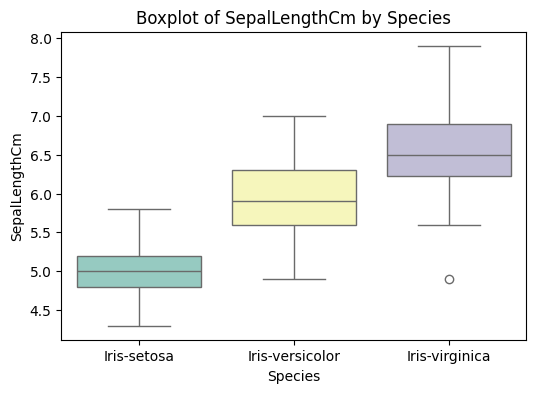

/tmp/ipython-input-14-112198921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=feature, data=df, palette='Set3')


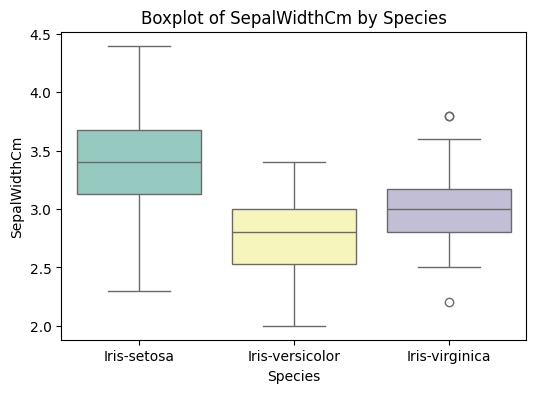

/tmp/ipython-input-14-112198921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=feature, data=df, palette='Set3')


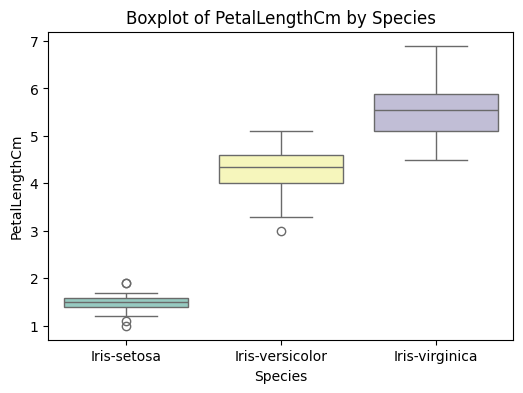

/tmp/ipython-input-14-112198921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=feature, data=df, palette='Set3')


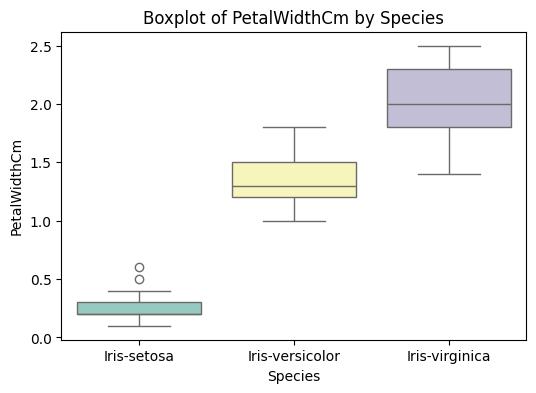

In [14]:
for feature in df.columns[:-1]:  # Exclude 'Species'
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Species', y=feature, data=df, palette='Set3')
    plt.title(f'Boxplot of {feature} by Species')
    plt.show()

## Split the Data

In [8]:
from sklearn.model_selection import train_test_split

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train the Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

## Evaluate the Model

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



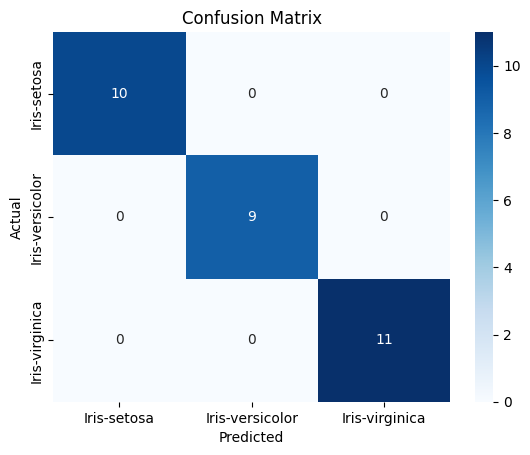

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()